<a href="https://colab.research.google.com/github/Aras1703/Machine-Learning-Submission/blob/main/Time_Series_Analysis_Electrical_Consume_Energy_Predicting_using_LMU_(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras_lmu

In [ ]:
from datetime import datetime, timedelta
from dateutil import parser
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras_lmu import LMU
from datetime import datetime
import requests
import tensorflow as tf
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('opsd_germany_daily.csv')
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,1/1/2006,1069.18400,NaN,NaN,NaN
1,1/2/2006,1380.52100,NaN,NaN,NaN
2,1/3/2006,1442.53300,NaN,NaN,NaN
3,1/4/2006,1457.21700,NaN,NaN,NaN
4,1/5/2006,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,12/27/2017,1263.94091,394.507,16.530,411.037
4379,12/28/2017,1299.86398,506.424,14.162,520.586
4380,12/29/2017,1295.08753,584.277,29.854,614.131
4381,12/30/2017,1215.44897,721.247,7.467,728.714


In [ ]:
df = df[['Date', 'Consumption']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)
df.drop(columns='Date', axis=1, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Consumption
Date,
2006-01-01,1069.18400
2006-01-02,1380.52100
2006-01-03,1442.53300
2006-01-04,1457.21700
2006-01-05,1477.13100
...,...
2017-12-27,1263.94091
2017-12-28,1299.86398
2017-12-29,1295.08753


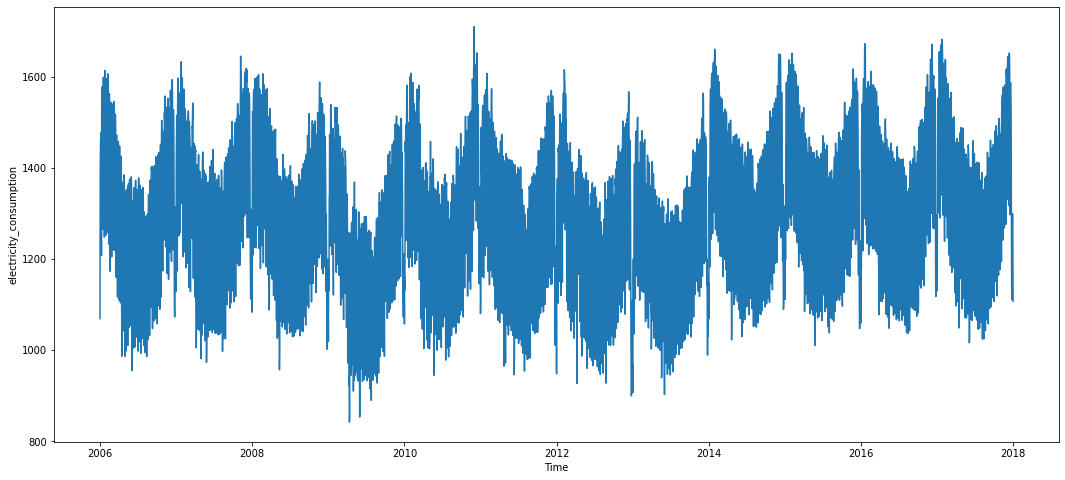

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(df['Consumption'])
plt.xlabel('Time')
plt.ylabel('electricity_consumption')
plt.grid(False)
plt.show()

In [ ]:
df = df.values
df

array([[1069.184  ],
       [1380.521  ],
       [1442.533  ],
       ...,
       [1295.08753],
       [1215.44897],
       [1107.11488]])

In [ ]:
training_len = int(np.ceil(len(df)*.80))
training_len 

3507

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-1.62582675],
       [ 0.25244916],
       [ 0.62656353],
       ...,
       [-0.26296542],
       [-0.74341968],
       [-1.39699221]])

In [ ]:
train_data = scaled_data[0:int(training_len), :]
X_train = []
y_train = []

for i in range(30, len(train_data)):
    X_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[-1.62582675,  0.25244916,  0.62656353, ...,  0.20725644,
        -0.52161261,  1.30339248],
       [ 0.25244916,  0.62656353,  0.71515115, ..., -0.52161261,
         1.30339248,  1.42650659],
       [ 0.62656353,  0.71515115,  0.83529102, ...,  1.30339248,
         1.42650659,  1.4687673 ],
       ...,
       [ 0.70172787,  0.57786568,  0.46474211, ...,  0.09191879,
         0.28212517,  0.17979452],
       [ 0.57786568,  0.46474211,  0.25115208, ...,  0.28212517,
         0.17979452,  0.30808489],
       [ 0.46474211,  0.25115208, -1.04175417, ...,  0.17979452,
         0.30808489,  0.14698139]])

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[-1.62582675],
        [ 0.25244916],
        [ 0.62656353],
        ...,
        [ 0.20725644],
        [-0.52161261],
        [ 1.30339248]],

       [[ 0.25244916],
        [ 0.62656353],
        [ 0.71515115],
        ...,
        [-0.52161261],
        [ 1.30339248],
        [ 1.42650659]],

       [[ 0.62656353],
        [ 0.71515115],
        [ 0.83529102],
        ...,
        [ 1.30339248],
        [ 1.42650659],
        [ 1.4687673 ]],

       ...,

       [[ 0.70172787],
        [ 0.57786568],
        [ 0.46474211],
        ...,
        [ 0.09191879],
        [ 0.28212517],
        [ 0.17979452]],

       [[ 0.57786568],
        [ 0.46474211],
        [ 0.25115208],
        ...,
        [ 0.28212517],
        [ 0.17979452],
        [ 0.30808489]],

       [[ 0.46474211],
        [ 0.25115208],
        [-1.04175417],
        ...,
        [ 0.17979452],
        [ 0.30808489],
        [ 0.14698139]]])

In [ ]:
model = tf.keras.models.Sequential([
  LMU(memory_d=1, order=256, theta=784, hidden_cell=tf.keras.layers.SimpleRNNCell(units=10)),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(X_train, y_train, epochs=100, callbacks=[lr_schedule])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
109/109 [==============================] - 14s 60ms/step - loss: 0.4199 - mae: 0.7946 - lr: 1.0000e-06
Epoch 2/100
109/109 [==============================] - 7s 60ms/step - loss: 0.4199 - mae: 0.7946 - lr: 1.1220e-06
Epoch 3/100
109/109 [==============================] - 6s 59ms/step - loss: 0.4198 - mae: 0.7944 - lr: 1.2589e-06
Epoch 4/100
109/109 [==============================] - 7s 64ms/step - loss: 0.4197 - mae: 0.7943 - lr: 1.4125e-06
Epoch 5/100
109/109 [==============================] - 7s 62ms/step - loss: 0.4196 - mae: 0.7942 - lr: 1.5849e-06
Epoch 6/100
109/109 [==============================] - 7s 61ms/step - loss: 0.4194 - mae: 0.7940 - lr: 1.7783e-06
Epoch 7/100
109/109 [==============================] - 7s 63ms/step - loss: 0.4193 - mae: 0.7938 - lr: 1.9953e-06
Epoch 8/100
109/109 [==============================] - 7s 63ms/step - loss: 0.4191 - mae: 0.7936 - lr: 2.2387e-06
Epoch 9/100
109/109 [==============================] - 7s 63ms/step - loss: 0.4189 - ma

In [ ]:
scaled_data_test = scaler.transform(df)
scaled_data_test

array([[-1.62582675],
       [ 0.25244916],
       [ 0.62656353],
       ...,
       [-0.26296542],
       [-0.74341968],
       [-1.39699221]])

In [ ]:
test_data = scaled_data_test
X_test = []
y_test = df[30:, :]
for i in range(30, len(test_data)):
    X_test.append(test_data[i-30:i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
var=explained_variance_score(y_test, predictions) 

mae=mean_absolute_error(y_test, predictions)
mse=mean_squared_error (y_test, predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predictions)  
metric=[var,mae,mse,rmse,r2]
evaluate=['Explained variance','MAE','MSE','RMSE','R^2']
performance_evaluate=pd.DataFrame([evaluate,metric])
performance_evaluate

,0,1,2,3,4
0,Explained variance,MAE,MSE,RMSE,R^2
1,0.918681,27.694,2230.56,47.2288,0.918667


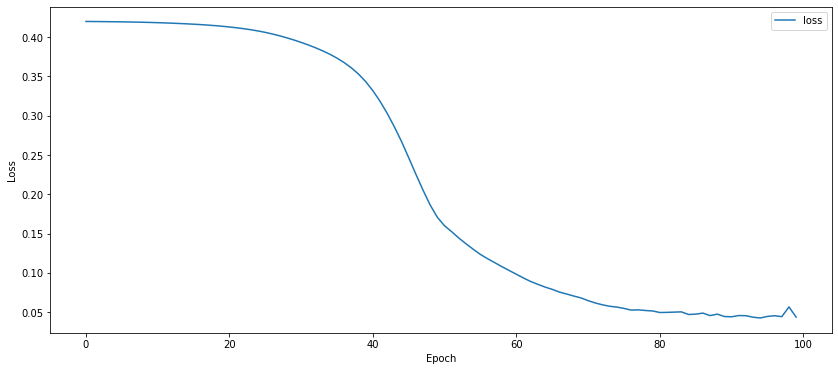

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(history.history["loss"], label="loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
train = df[:training_len]
valid = df[30:]
valid = pd.DataFrame(predictions)
valid.columns=['Predictions']
valid

,Predictions
0,1572.864746
1,1579.691040
2,1577.078491
3,1547.386597
4,1342.611206
...,...
4348,1110.053101
4349,1254.509155
4350,1289.071411
4351,1195.744263


In [ ]:
df = pd.read_csv('opsd_germany_daily.csv')
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,1/1/2006,1069.18400,NaN,NaN,NaN
1,1/2/2006,1380.52100,NaN,NaN,NaN
2,1/3/2006,1442.53300,NaN,NaN,NaN
3,1/4/2006,1457.21700,NaN,NaN,NaN
4,1/5/2006,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,12/27/2017,1263.94091,394.507,16.530,411.037
4379,12/28/2017,1299.86398,506.424,14.162,520.586
4380,12/29/2017,1295.08753,584.277,29.854,614.131
4381,12/30/2017,1215.44897,721.247,7.467,728.714


In [ ]:
df = df[['Date', 'Consumption']]
df.set_index(df['Date'],inplace=True)
df.drop(columns='Date', axis=1, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Consumption
Date,
1/1/2006,1069.18400
1/2/2006,1380.52100
1/3/2006,1442.53300
1/4/2006,1457.21700
1/5/2006,1477.13100
...,...
12/27/2017,1263.94091
12/28/2017,1299.86398
12/29/2017,1295.08753


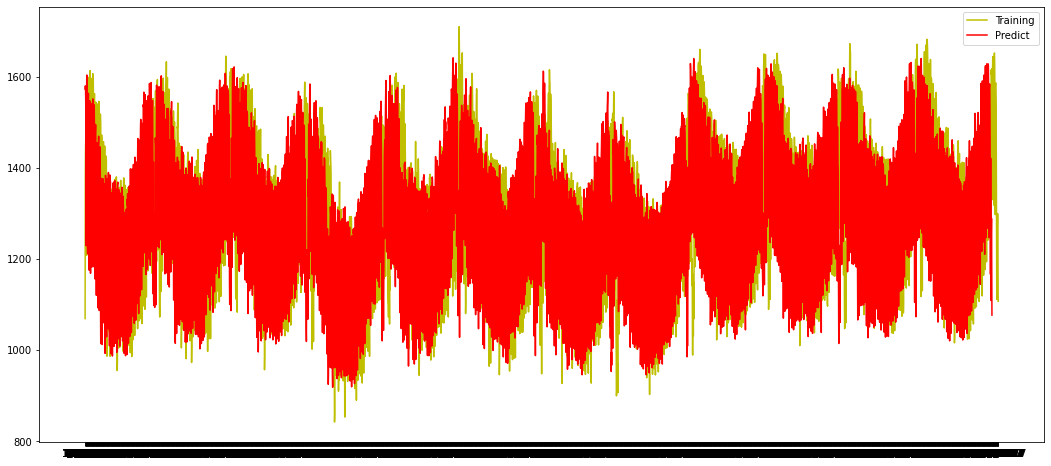

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df['Consumption'], label="Training", c = "y")
plt.plot(valid['Predictions'], label="Predict", c = "r")
plt.legend()
plt.show()